# load_breast_cancer

In [1]:
from sklearn import tree
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = sklearn.datasets.load_breast_cancer()
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['DESCR', 'data', 'feature_names', 'target', 'filename', 'target_names'])


In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
for f in data.keys():
    t = type(data[f])
    print('key: {}, type: {}'.format(f, t))
    if t == np.ndarray:
        print('shape: {}'.format(data[f].shape))

key: DESCR, type: <class 'str'>
key: data, type: <class 'numpy.ndarray'>
shape: (569, 30)
key: feature_names, type: <class 'numpy.ndarray'>
shape: (30,)
key: target, type: <class 'numpy.ndarray'>
shape: (569,)
key: filename, type: <class 'str'>
key: target_names, type: <class 'numpy.ndarray'>
shape: (2,)


In [5]:
X_data = data.data
y_data = data.target

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [7]:
model = tree.DecisionTreeClassifier()

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
y = model.predict(X_train)

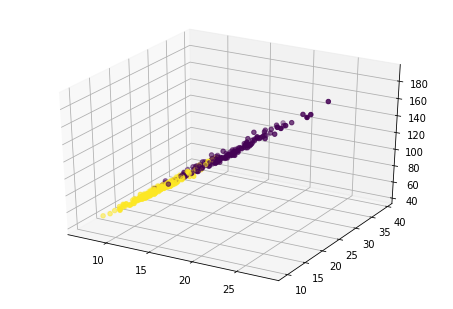

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train)
plt.show()

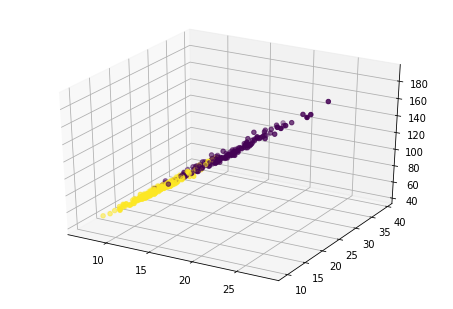

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y)
plt.show()

In [12]:
print(model.score(X_train, y_train))

1.0


In [13]:
print(model.score(X_test, y_test))

0.8947368421052632


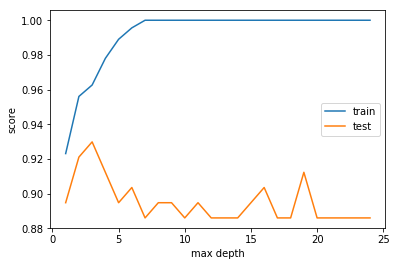

In [14]:
from sklearn.tree import DecisionTreeRegressor

train_score = []
test_score = []
depth_range = range(1, 25)

for depth in depth_range:
    model = tree.DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

plt.figure()
plt.plot(depth_range, train_score, label='train')
plt.plot(depth_range, test_score, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()